In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
X = np.array(
            [[495, 776,  423, 759,   1848, 655, 486],
            [518, 995,  548, 893,   2056, 584, 319],
            [561, 1097, 887, 1167,  2630, 515, 284],
            [414, 660,  367, 638,   1620, 534, 407],
            [400, 669,  484, 762,   1856, 460, 416],
            [304, 789,  621, 1149,  2366, 385, 282],
            [324, 563,  341, 544,   1507, 406, 407],
            [319, 608,  396, 568,   1501, 386, 363],
            [243, 843,  689, 1148,  2345, 438, 341],
            [247, 428,  354, 526,   1437, 332, 427],
            [239, 559,  388, 567,   1527, 293, 258],
            [235, 767,  562, 927,   1948, 372, 433]])
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=np.inf)


# 1. Affichage de la matrice de correlation


In [4]:
g = X.mean(axis=0)  # centre de gravité

Y = X - g  # centrage des données

std = Y.std(axis=0)  # écart-type

Z = Y / std  # matrice de données centrées et réduites

# matrice de variance-covariance (@ est le produit matriciel)
V = 1/X.shape[0] * (Y.T @ Y)

R = 1/X.shape[0] * (Z.T @ Z)  # matrice de corrélation

print(R)  # affichage de la matrice de corrélation


[[ 1.          0.65532956  0.33218856  0.23248901  0.37459064  0.8555748   0.0068796 ]
 [ 0.65532956  1.          0.85504327  0.82679458  0.87907462  0.58922087 -0.36469423]
 [ 0.33218856  0.85504327  1.          0.9263958   0.95947671  0.19613878 -0.48628058]
 [ 0.23248901  0.82679458  0.9263958   1.          0.98168805  0.24681402 -0.40185403]
 [ 0.37459064  0.87907462  0.95947671  0.98168805  1.          0.32126911 -0.43723528]
 [ 0.8555748   0.58922087  0.19613878  0.24681402  0.32126911  1.          0.30376123]
 [ 0.0068796  -0.36469423 -0.48628058 -0.40185403 -0.43723528  0.30376123  1.        ]]


# 2. Affichage des valeurs propres, des proportions d'inertie et des proportions d'inertie cumulées


In [5]:
 # calcul des valeurs et vecteurs propres
R = np.corrcoef(Z,rowvar=False)
valeurPropre, vecteurPropre = np.linalg.eig(R)
idx = valeurPropre.argsort()[::-1] # tri des valeurs propres
valeurPropre = valeurPropre[idx]
vecteurPropre = vecteurPropre[:,idx]

# calcul des proportions d'inertie

taux_inertie = valeurPropre / valeurPropre.sum() 
#taux_inertie = valeurPropre / Z.shape[1] # autre méthode

# calcul des proportions d'inertie cumulées
taux_inertie_cumule = taux_inertie.cumsum()
tab = np.column_stack([valeurPropre, taux_inertie, taux_inertie_cumule])
print(tab)  # affichage des valeurs propres, des proportions d'inertie et des proportions d'inertie cumulées


[[4.33089949 0.61869993 0.61869993]
 [1.82915632 0.26130805 0.88000797]
 [0.63057623 0.09008232 0.97009029]
 [0.12847268 0.01835324 0.98844353]
 [0.06186461 0.0088378  0.99728133]
 [0.01797486 0.00256784 0.99984917]
 [0.0010558  0.00015083 1.        ]]


# 3. Affichage des coordonnées des individus dans le plan principale


In [6]:
# calcul des coordonnées des individus dans le nouveau repère
composantes_principales = Z @ vecteurPropre
# affichage des coordonnées des individus dans le nouveau repère
print(composantes_principales)


[[ 0.22827507  2.90330869 -0.59088613  0.25080936 -0.11502099  0.05982244 -0.02751457]
 [ 2.0388371   1.18584218  1.03614659  0.35571645  0.32882287 -0.13181902  0.00387993]
 [ 4.51509456 -0.09371412  0.58997011 -0.75855821 -0.03695836  0.08955087 -0.00598703]
 [-0.97281263  1.43361276  0.29111024  0.26807918 -0.09527047  0.06806806  0.05073996]
 [-0.33707312  0.64688816 -0.29515337 -0.31855117 -0.267969   -0.07184609  0.00310676]
 [ 1.68256213 -1.80725364 -0.10406864  0.39585556 -0.45921523 -0.22797506  0.01196861]
 [-2.12756671  0.33581268  0.1155944  -0.1076374   0.00984525 -0.0757066  -0.0728462 ]
 [-1.74626182 -0.17973484  0.52578213 -0.14312696  0.19338414  0.03826782  0.05080004]
 [ 1.77868976 -1.4103355  -1.03920223  0.45154114  0.06271549  0.28093501 -0.00955446]
 [-2.97939896 -0.38207893 -0.41805666 -0.38945164 -0.19728191  0.06080385  0.0164862 ]
 [-1.96329414 -1.87342731  1.36963695  0.1696141   0.08709108  0.07960807 -0.02873032]
 [-0.11705123 -0.75892011 -1.48087339 -0.17

# 4. Projection des individus sur le plan principal


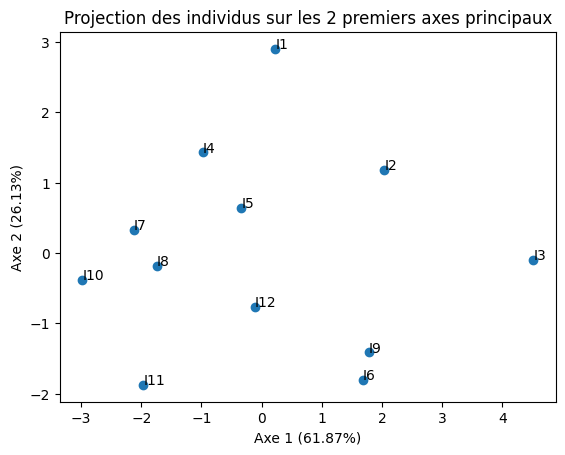

In [7]:
index = ['I1', 'I2', 'I3', 'I4', 'I5', 'I6',
         'I7', 'I8', 'I9', 'I10', 'I11', 'I12']

plt.title("Projection des individus sur les 2 premiers axes principaux")
plt.scatter(composantes_principales[:, 0], composantes_principales[:, 1])
plt.xlabel("Axe 1 ({}%)".format(round(taux_inertie[0]*100, 2)))
plt.ylabel("Axe 2 ({}%)".format(round(taux_inertie[1]*100, 2)))

for i, txt in enumerate(index):
    plt.annotate(
        txt, (composantes_principales[i, 0], composantes_principales[i, 1]))


# 5. Coordonnées des variables sur tous les axes principaux


In [8]:
print(np.sqrt(valeurPropre) * vecteurPropre) # racine carrée des valeurs propres * vecteurs propres

[[ 0.58175405  0.70878514  0.35070254 -0.16722277 -0.07842061 -0.04537214  0.00465935]
 [ 0.9684819   0.12918734  0.05298602  0.02565218  0.20066259 -0.03994913 -0.00514552]
 [ 0.92966449 -0.2749384  -0.11730392 -0.19718956  0.02400858  0.08286597  0.00676082]
 [ 0.91198507 -0.26420961 -0.28253447  0.11150296 -0.05980813 -0.04751432  0.01957721]
 [ 0.9621389  -0.18782985 -0.16618762  0.01298014 -0.10255552 -0.01136612 -0.02398028]
 [ 0.49650838  0.84352969  0.00804693  0.19213216 -0.01606196  0.06854517  0.00106802]
 [-0.43160151  0.64642892 -0.61927977 -0.10701081  0.02281    -0.01919077 -0.00156485]]


# 6.Afficher un tableau résumant les corrélations entre les variables et les axes principaux.


In [9]:
correlations = np.corrcoef(Z, composantes_principales, rowvar=False)[:Z.shape[1], Z.shape[1]:] # calcul des corrélations entre les variables initiales et les composantes principales
print(correlations)

[[ 0.58175405  0.70878514  0.35070254 -0.16722277 -0.07842061 -0.04537214  0.00465935]
 [ 0.9684819   0.12918734  0.05298602  0.02565218  0.20066259 -0.03994913 -0.00514552]
 [ 0.92966449 -0.2749384  -0.11730392 -0.19718956  0.02400858  0.08286597  0.00676082]
 [ 0.91198507 -0.26420961 -0.28253447  0.11150296 -0.05980813 -0.04751432  0.01957721]
 [ 0.9621389  -0.18782985 -0.16618762  0.01298014 -0.10255552 -0.01136612 -0.02398028]
 [ 0.49650838  0.84352969  0.00804693  0.19213216 -0.01606196  0.06854517  0.00106802]
 [-0.43160151  0.64642892 -0.61927977 -0.10701081  0.02281    -0.01919077 -0.00156485]]


# 7. Projection des variables sur le plan principal


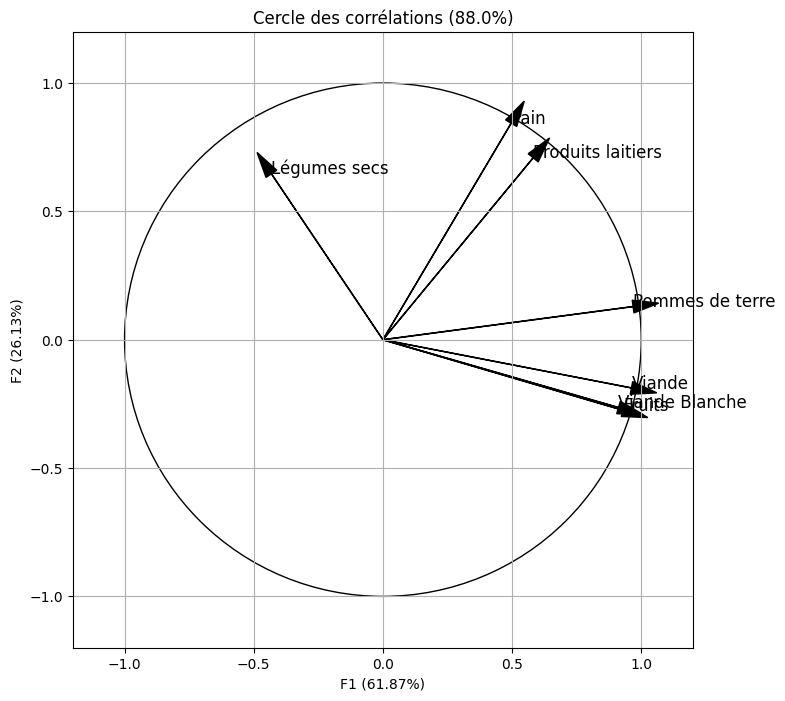

In [10]:
# Cercle des corrélations
columns = ['Produits laitiers', 'Pommes de terre', 'Fruits',
           'Viande Blanche', 'Viande', 'Pain', 'Légumes secs']
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("F1 ({}%)".format(round(taux_inertie[0]*100, 2)))
ax.set_ylabel("F2 ({}%)".format(round(taux_inertie[1]*100, 2)))
ax.set_title('Cercle des corrélations ({}%)'.format(round((taux_inertie[0]+taux_inertie[1])*100, 2)))
ax.add_patch(plt.Circle((0, 0), 1, fill=False))
ax.grid()
for i, text in enumerate(columns):
    ax.arrow(0, 0, correlations[i, 0], correlations[i, 1],
             head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(correlations[i, 0], correlations[i, 1], text, fontsize='large')
plt.show()


# 8. Intrepretation
- Les variables 'Pommes de terre', 'Fruits', 'Viande Blanche', 'Viande' ont des coordonnées similaires sur la première composante principale, suggérant qu'elles sont corrélées positivement entre elles. Cela peut indiquer que ces aliments sont souvent consommés ensemble.
- La variable 'Produits laitiers' est corrélée positivement avec la deuxième composante principale, ce qui peut indiquer qu'elle est différente des autres variables en termes de composition nutritionnelle.
- Les variables 'Pain' et 'Légumes secs' ont des coordonnées similaires sur la deuxième composante principale, suggérant une corrélation positive entre elles. Cela peut indiquer que ces aliments sont souvent consommés ensemble.

# 9. Qualité de représentation des individus

In [11]:
points = composantes_principales[:,:2] # on ne garde que les 2 premiers axes
# calucul de la qualite de représentation des individus
qualite = np.sum(points**2, axis=1) / np.linalg.norm(Z, axis=1)**2
print(qualite.reshape(-1, 1)) # affichage de la qualité de représentation des individus

[[0.95178759]
 [0.80756248]
 [0.95625905]
 [0.94553613]
 [0.66706119]
 [0.93404631]
 [0.99228239]
 [0.90106321]
 [0.79035717]
 [0.96067635]
 [0.79324762]
 [0.19133376]]


# 10. contribution  de  chaque  individu  à  l’inertie  de  chaque  axe  principal.

In [12]:
contribition = (1/points.shape[0] * points**2) / valeurPropre[:2]
contribition

array([[0.00100267, 0.38402046],
       [0.07998448, 0.06406513],
       [0.39226029, 0.00040011],
       [0.01820954, 0.09363358],
       [0.0021862 , 0.01906454],
       [0.0544732 , 0.1488011 ],
       [0.08709777, 0.00513762],
       [0.05867585, 0.00147174],
       [0.06087529, 0.09061765],
       [0.17080397, 0.0066508 ],
       [0.07416712, 0.15989748],
       [0.00026363, 0.02623977]])

# 11. Marquer graphiquement tous les individus ayant une très bonne qualité de représentation.

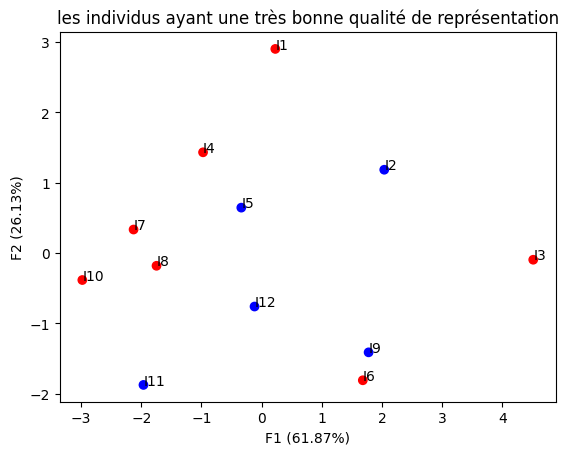

In [16]:
colors = ['r' if i > 0.9 else 'b' for i in qualite]

plt.title("les individus ayant une très bonne qualité de représentation")
plt.scatter(composantes_principales[:,0],composantes_principales[:,1],c=colors)
plt.xlabel("F1 ({}%)".format(round(taux_inertie[0]*100,2)))
plt.ylabel("F2 ({}%)".format(round(taux_inertie[1]*100,2)))

for i, txt in enumerate(index):
    plt.annotate(txt, (composantes_principales[i,0], composantes_principales[i,1]))

# 12. Déterminer les individus qui sont mal présentes sur le plan principal. Par quoi, pouvez-vous interpréter ça ? 


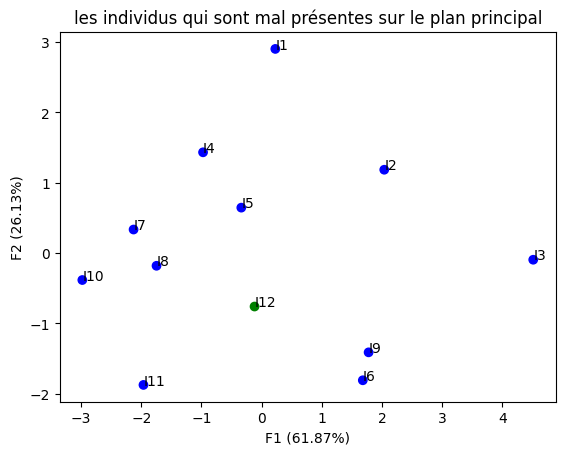

In [17]:


colors = ['g' if i < 0.3 else 'b' for i in qualite]

plt.title("les individus qui sont mal présentes sur le plan principal")
plt.scatter(composantes_principales[:,0],composantes_principales[:,1],c=colors)
plt.xlabel("F1 ({}%)".format(round(taux_inertie[0]*100,2)))
plt.ylabel("F2 ({}%)".format(round(taux_inertie[1]*100,2)))

for i, txt in enumerate(index):
    plt.annotate(txt, (composantes_principales[i,0], composantes_principales[i,1]))